In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats
import pickle

## 제안 3 : 연도별 커뮤니티 게시글에 있는 키워드를 분석

In [2]:
df_dcinside = pd.read_csv("./teamkim_datas.SNS_DCinside.csv")
df_helpline = pd.read_csv("./teamkim_datas.SNS_helpline.csv")
df_naver_symptom = pd.read_csv("./teamkim_datas.SNS_naver_kin_symptom.csv")

In [3]:
df_dcinside["date"] = pd.to_datetime(df_dcinside["date"]).dt.strftime("%Y")
df_dcinside

_id                             title  date  \
0    65d87bac24e72d643e1e4bce    갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?  2024   
1    65d87baf24e72d643e1e4bd0  영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지  2024   
2    65d87bb224e72d643e1e4bd2            검사 받는 병원 근처 지역 병원으로 바꿈  2024   
3    65d87bb624e72d643e1e4bd4               섬유종 수술은 아산병원이 젤 나음?  2024   
4    65d87bb924e72d643e1e4bd6       신섬 증상 별로 안 심하면 코셀루고 약 못 먹나?  2024   
..                        ...                               ...   ...   
484  65d8829124e72d643e1e4f96                          희귀병 걸렸다ㅜ  2019   
485  65d8829424e72d643e1e4f98              희귀병이니 갤마저 글이 희귀하네...  2019   
486  65d8829824e72d643e1e4f9a                               힘들다  2019   
487  65d8829b24e72d643e1e4f9c                         좋은 일 하십니다  2019   
488  65d8829e24e72d643e1e4f9e                               발도잔  2019   

                                              contents  up  down  \
0         피부랑 똑같은색으로 점있는 부분만 문신하면 티는 조금 나겠지만 조금은 희미해질듯   0     0   
1    https://www.newsthevoice.com/news/articleView....   0     0   
2    계속 서울로 정기검진 받으러 가다가 어제를 마지막으로 그냥 집근처에 있는 지방 대학...   0     0   
3                                             좀 큰 부위인데   2     0   
4    엄청 심한건 아닌 거 같은데...먹어보고싶다..\n\n작년 여름엔 머리랑 눈이 너무...   0     0   
..                                                 ...  ..   ...   
484         베체트 ㅆㅂ 이거 뭐야?\n\n확진줘놓고 아프면 오라니 이게 말이냐?방구냐?   0     0   
485            자주 들를게 나도 희귀병 환우얍 흑 \n- dc official App   1     0   
486  병명찾기 몇년째인지\n정말 사람들 말대로 다 내 머릿속에 있는건지\n아님 정말 원인...   1     0   
487            실제로 환우들이 여기를 사용할지는 모르겠다만 모두들 힘내십쇼. 화이팅!   0     0   
488                                                  꾹   1     0   

                                            comment[0]  \
0                                                  NaN   
1                                      너 살아 있었구나\n다행이다   
2                                                  NaN   
3                       음..... 그런 듯 나도 9cm 종양 아산에서 제거함   
4                                 카페에서 부작용 보니까 엄청 심하던데   
..                                                 ...   
484  헐....힘내요..나도 섬유종이라는 희귀변잇는데 병원에서 답도 안주고 지들 책임안지...   
485                                    무슨 병?? - dc App   
486  힘들수록 네 자신을 믿고 사랑해야해 ~! 난 1년 전부터 있던 증상 한달 전쯤에야 ...   
487                                              ㅎㅇㅌ~!   
488                                                NaN   

                                            comment[1]  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  고마워   
4                                                  NaN   
..                                                 ...   
484                                         ㅜㅜ지금은 어때요?   
485                                 엘러스단로스증후군 - dc App   
486  고마워ㅜ 너도 얼른 낫길 기도할게ㅜ 혹시 어떤 병명인지 물어봐도 되? 이제 더이상 ...   
487                                                NaN   
488                                                NaN   

                                            comment[2]  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
484  베체트 자가면역병이라서 치료약없어요. 증상 발현 시에 증상만 좀 개선시켜줄 방법밖에...   
485                                                NaN   
486    나는 근긴장이상증 이라는 병이야 ~ 자가 면역 항체검사 결과 잘 나오길 빌게 ~ :)   
487                                                NaN   
488                                                NaN   

                                         comment[3]  ... comment[44]  \
0                                               NaN  ...         NaN   
1                                               NaN  ...         NaN   
2                        

In [4]:
df_helpline["date"] = pd.to_datetime(df_helpline["date"]).dt.strftime("%Y")
df_helpline

_id  \
0    65dbe0a7a48a1fe6c0dcc313   
1    65dbe0a7a48a1fe6c0dcc314   
2    65dbe0a7a48a1fe6c0dcc315   
3    65dbe0a8a48a1fe6c0dcc316   
4    65dbe0a9a48a1fe6c0dcc317   
..                        ...   
700  65dbe623a48a1fe6c0dcc5cf   
701  65dbe626a48a1fe6c0dcc5d0   
702  65dbe629a48a1fe6c0dcc5d1   
703  65dbe62ea48a1fe6c0dcc5d2   
704  65dbe631a48a1fe6c0dcc5d3   

                                         title_disease  date  \
0                        소아피부근염\n질환명 : 기타 피부근염 (M33.1)  2024   
1        상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0)  2024   
2                   국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3)  2024   
3      희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6)  2024   
4                                          의료비지원 부양의무자  2024   
..                                                 ...   ...   
700                  질환명 변경에 따른 협회명 변경 관련\n질환명 : 강직척추염  2018   
701            PTEN 과오종 증후군 희귀질환코드\n질환명 : PTEN 과오종 증후군  2018   
702     질병 확정과 진단 그리고 지원 사업을 알고 싶습니다.\n질환명 : 성인호흡곤란증후군  2018   
703             polymicrogyria 가 V214 로 산정특례등록이 가능한가요?  2018   
704  척수소뇌성 운동실조(Spinocerebellar ataxia: SCA)코딩\n질환명...  2018   

                                         post_contents  \
0            2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다   
1    아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...   
2    희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...   
3    24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요   
4    24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...   
..                                                 ...   
700  업무에 노고가 많으십니다.\n\n한국강직척추염협회(구, 한국강직성척추염협회)의 단체...   
701  안녕하세요 홈페이지 개편전에 문의를 드렸는데 그땐 (PTEN 과오종 증후군) 이 산...   
702  12월10일 부친께서 갑작스런 호흡곤란과 의식 불명으로 응급실로 이동하셨고, 현재 ...   
703  3세 남아로 발달지연(좌측 편마비)과 우측 4/5수지 선천결손으로 시행한 B-MRI...   
704  척수소뇌성 운동실조(Spinocerebellar ataxia: SCA)는 G11 코...   

                                        reply_contents  
0    안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...  
1    안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n개...  
2    안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...  
3    안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...  
4    안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...  
..                                                 ...  
700  안녕하세요?\n\n1:1상담을 통해 문의하신 '관련사이트 정보 변경'에 대해 답변드...  
701  안녕하세요?\n\n1:1상담을 통해 문의하신 '희귀질환 목록 지정'에 대해 답변드립...  
702  안녕하십니까?\n\n1:1상담을 통해 문의하신 "질환에 대한 진단 및 의료비 지원"...  
703  안녕하세요?\n\n1:1상담을 통해 문의하신 '희귀질환 목록 포함 여부'에 대해 답...  
704  안녕하십니까?\n\n1:1상담을 통해 문의하신 '희귀질환 상병코드'에 대하여 답변드...  

[705 rows x 5 columns]

In [5]:
df_naver_symptom['question_datetime'] = df_naver_symptom['question_datetime'].str.replace('작성일\\n', '').str.strip()

# "조회수"라는 값이 포함되어있는 행을 모두 지우는 코드
df_naver_symptom = df_naver_symptom[~df_naver_symptom['question_datetime'].str.contains('조회수')]

df_naver_symptom['question_datetime'] = pd.to_datetime(df_naver_symptom['question_datetime']).dt.strftime("%Y")
df_naver_symptom = df_naver_symptom.reset_index()
df_naver_symptom

index                       _id      question_title  \
0        0  65dd8f1d5bf02f695c36f1e3     전립선비대증 증상 수술 문의   
1        2  65dd8f1f5bf02f695c36f1e7   주부습진 증상 왜 안없어질까요?   
2        3  65dd8f205bf02f695c36f1e9  무릎통증 증상 ㅜㅜ 참고로 20대   
3        4  65dd8f205bf02f695c36f1eb     무릎통증 증상 꽤 오래됐는데   
4        5  65dd8f215bf02f695c36f1ed     돌발성 난청 증상이 맞나요?   
..     ...                       ...                 ...   
242    247  65dd90055bf02f695c36f3d1     연골판파열증상 확인부탁드려요   
243    248  65dd90065bf02f695c36f3d3          전립선염 증상 문의   
244    249  65dd90075bf02f695c36f3d5     이 증상들은 무슨 증상인가요   
245    250  65dd90085bf02f695c36f3d7         고혈압 관련증상입니다   
246    251  65dd90095bf02f695c36f3d9         고혈압 관련증상입니다   

                                      question_content question_datetime  \
0    전립선비대증 증상이 만성으로 이어지는 상황으로 수술을 고려하고 있어요.\n전립선비대...              2024   
1    주부습진 증상이 안사라져요. 핸드크림도 꾸준히 바르는데 습진증상이 사라지기는 커녕 ...              2024   
2    20대 후반인데 무릎통증 증상이 있습니다.\n무릎을 구부릴 때 제일 아프다고 느꼈으...              2024   
3    무릎통증 증상이 있어요.\n근데 이게 갑자기 생긴게 아니라\n좀 오랫동안 무릎통증 ...              2024   
4    어제 저녁 갑자기 귀에서 웅~ 소리가 들리고 주변소리가 안들렸는데 한 3초뒤에는 괜...              2024   
..                                                 ...               ...   
242  연골판파열증상인지 확인부탁드려요\n제가 테니스를 치면서 몸을 트는데\n무릎에 뭔가 ...              2023   
243  안녕하세요,\n약 두달전 요도염 증상으로 치료를 받았으며\n당시 고환이 자욱한 느낌...              2023   
244  3주째 거의 이런 증상이고 코대원 먹으면 괜찮아지는데 안 먹으면 진짜 저 증상들처럼...              2023   
245  작년 12월에 건강검진했는데 혈압이 160이 나와서 병원에서 혈압약을 처방받았는데요...              2023   
246  작년 12월에 건강검진했는데 혈압이 160이 나와서 병원에서 혈압약을 처방받았는데요...              2023   

                                       answer1_content answer1_datetime  \
0    안녕하세요. 하이닥-네이버 지식iN 상담의 류경호 입니다.\n부모님 전립선비대증 증...      2024.01.15.   
1    안녕하세요.\n닥톡-네이버 지식iN 상담한의사 김태욱 원장입니다. \n주부 습진증상...      2024.01.22.   
2    안녕하세요. 대한의사협회·네이버 지식iN 상담의사 김옥선 입니다.\n무릎통증 증상과...      2024.02.13.   
3    안녕하세요. 하이닥-네이버 지식iN 상담의 김상범 입니다.\n무릎 통증은 부상에 의...      2024.02.15.   
4    안녕하세요! \n닥톡-네이버지식in 상담한의사  최용석입니다.\n3초 정도 나타난 ...      2024.01.29.   
..                                                 ...              ...   
242  안녕하세요. 대한의사협회·네이버 지식iN 상담의사 김옥선 입니다.\n연골판파열증상에...      2023.01.19.   
243  안녕하세요. 하이닥-네이버 지식iN 상담의 길명철 입니다.\n증상이 있어 검사할 당...      2023.07.14.   
244  안녕하세요.\n 역류성 식도염의 가능성이 있어 보입니다.\n 역류성 식도염의 증상은...      2023.02.07.   
245  안녕하세요. \n 일반적으로 알려진 것과는 다르게, 혈압 상승과 관련된 특이한 증상...      2023.02.09.   
246  안녕하세요. \n 일반적으로 알려진 것과는 다르게, 혈압 상승과 관련된 특이한 증상...      2023.02.09.   

    answer2_content answer2_datetime answer3_content answer3_datetime  
0               NaN              NaN             NaN              NaN  
1               NaN              NaN             NaN              NaN  
2               NaN              NaN             NaN              NaN  
3               NaN              NaN             NaN              NaN  
4               NaN              NaN             NaN              NaN  
..              ...              ...             ...              ...  
242             NaN              NaN             NaN              NaN  
243             NaN              NaN             NaN              NaN  
244             NaN              NaN             NaN              NaN  
245             NaN              NaN             NaN              NaN  
246             NaN              NaN             NaN              NaN  

[247 rows x 11 columns]

In [6]:
df_dcinside["date"].value_counts()
# df_dcinside에서는 2019, 2020, 2021, 2022, 2023, 2024 총 여섯가지 년수가 존재.

date
2023    252
2022    106
2021     75
2020     28
2024     18
2019     10
Name: count, dtype: int64

In [7]:
df_helpline["date"].value_counts()
# df_helpline에서는 2018, 2019, 2020, 2021, 2022, 2023, 2024 총 일곱가지 년수가 존재

date
2022    138
2021    137
2019    137
2023    131
2020    121
2024     36
2018      5
Name: count, dtype: int64

In [8]:
df_naver_symptom["question_datetime"].value_counts()
# df_naver_symptom에서는 2013, 2020,2022,2023,2024 총 다섯가지 년수가 존재함.
# 2013년은 왜 뜬금없이 있을까?

question_datetime
2023    180
2024     62
2013      2
2022      2
2020      1
Name: count, dtype: int64

공통적인 연도인 2020, 2022, 2023, 2024 네개의 연도에 해당하는 키워드를 분류해본다.

### 2020년 키워드

In [9]:
dc_2020_title = df_dcinside.query("date == '2020'")["title"].to_list()
dc_2020_contents = df_dcinside.query("date == '2020'")["contents"].to_list()
list_dc_2020 = dc_2020_title + dc_2020_contents
list_dc_2020

['안락사&존엄사 관련 인권단체를 만들기 위해 카페를 개설했습니다',
 '저칼륨혈증 주기성 사지마비(feat 꾀병)',
 '쇼그렌은 언급 1도없네',
 '유전병 게이들아 드디어 유전자가위가 상용화 된단다',
 '나보다 희귀한 질병인애 있냐?',
 '유전자가위 언제 상용화되냐',
 '신경섬유종? 이거인 사람 있음?',
 '수험생인데 희귀병때문에 지장이 너무 심한데 어쩌냐',
 '스티븐슨 증후근 가지고있는사람있냐?',
 '이런갤도 있네',
 '실내에선 안그러는데 밖에 나가서 걸으면 다리가 미친듯이 간지러움',
 '와서 환우끼리 정보공유하자',
 '23일이 희귀질환 극복의날 이였다고 하던데',
 '오늘이 희귀질환 극복의 날이래요',
 '살만한데 그동안 상처받은 것들이',
 '본인에게 군대란',
 '갤이 흥했으면 좋겠다.',
 '존나 속상하고 힘들어서 한탄글 작성하다가',
 '장애인 되고싶다',
 '신경과: 성형외과에 가세요!',
 '오늘 군입대..',
 '곧 있으면 군대간다.',
 '난 너희들이 너무 대단해',
 '한탄 좀 하고 간다',
 '많이 견뎌왔다고 생각했는데',
 '좆같은이유',
 '정말로 신체증상장애일까',
 '희귀 면역질환에 대한 정보를 모으고 있습니다.',
 '안녕하세요 여러분 말기암이나 불치병같은 특정사람만 존엄사가 되는 게 아니라 \\n누구나 존엄사를 선택하고 죽을 수 있는 사회를 만들고자 카페를 만들었습니다\\nhttps://cafe.naver.com/atropos920216',
 '15년 가까이 아침에 일어나면 약하게는 손발 마비 심할때는 목아래 전신마비 생기는 증상 안고 살아옴\\n이상하게 오후정도 되면 몸이 정상으로 돌아와서\\n남들이 보기에 아침에는 절뚝절뚝거리고 계단도 못올라가고 숟가락도 못쥐던 애가\\n오후두세시면 갑자기 뛰어다니고 저녁때 술자리는 꼬박꼬박 참여하니깐 하나같이 꾀병환자로 보네\\n아침에 학교오기 싫어하고 일하기싫어하는줄 알고\\n\\n우연히 응급실에 가게 되어서\\n제대로 병명 알고 지낸지는 이제 5년째\\n병명 모르던

In [10]:
helpline_2020_title = df_helpline.query("date == '2020'")["title_disease"].to_list()
helpline_2020_post = df_helpline.query("date == '2020'")["post_contents"].to_list()
helpline_2020_reply = df_helpline.query("date == '2020'")["reply_contents"].to_list()
list_helpline_2020 = helpline_2020_title + helpline_2020_post + helpline_2020_reply
list_helpline_2020

['원추각막 의료급여 희귀질환산정특례신규등록기준문의\\n질환명 : 원추각막 (H18.6)',
 '희귀질환인가요?\\n질환명 : 크립토콕쿠스증 (B45)',
 '희귀난치성질환 의료비지원사업 중 부양의무자 관련문의?\\n질환명 : 강직척추염, 요추부 (M45.6)',
 '희귀질환에 대하여\\n질환명 : 식도이완불능증',
 '취업 관련해서 하고있는 프로그램있나여?\\n질환명 : 기면증',
 '희귀질환자의 수\\n질환명 : 척수공동증 및 연수공동증 (G95.0)',
 '해당 희귀질환에 관한 사항..\\n질환명 : 척수공동증 및 연수공동증 (G95.0)',
 '라스무센뇌염 희귀질환....\\n질환명 : 라스무센뇌염',
 '난치병 여부\\n질환명 : 류마티스성다발근통',
 '엘러스-단로스증후군 입니다 만 어찌해야할지 모르겠어요...\\n질환명 : 엘러스-단로스증후군 (Q79.6)',
 '의료지지원 사업 소득산정 문의',
 '담당의사가 성인발병 스틸병으로 진단하여 치료하였으나 원무과에서 자기네 병원에서는 산정특례 지정이 안된다고\\n질환명 : 성인발병 스틸병 (M06.1)',
 '서울대병원(본원/분당) 진료시 임상의 배정이유\\n질환명 : 클라인펠터증후군, 두 개 이상의 X염색체를 가진 남성 (Q98.1)',
 '산정특례 기록',
 '산정특례문의\\n질환명 : 원추각막 (H18.6)',
 '원추각막문의\\n질환명 : 원추각막 (H18.6)',
 '정신분열증 불치 난치 판정을 받았습니다...\\n질환명 : 편집조현병은 주로 청각적 환각 및 지각장애를 동반하는 편집증형 망상이 지배적이다. 정동, 의지 및 언어장애와 긴장성 증상은 없거나 비교적 미미하다. (F20.0)',
 '앨러지성비염 관련\\n질환명 : 기타 앨러지비염 (J30.3)',
 '희귀질환 의료비지원 도중 추가 희귀질환 신청 가능한가요?\\n질환명 : 원발성 폐동맥고혈압 (I27.0)',
 '본인부담금 10% 보건소 의료비지원에 대하여\\n질환명 : 말기신장병 투석중 (N18.5)',
 '신청날짜와 서류\\n질환명

In [11]:
naver_2020_title = df_naver_symptom.query("question_datetime == '2020'")["question_title"].to_list()
naver_2020_question = df_naver_symptom.query("question_datetime == '2020'")["question_content"].to_list()
naver_2020_answer = df_naver_symptom.query("question_datetime == '2020'")["answer1_content"].to_list()
list_naver_2020 = naver_2020_title + naver_2020_question + naver_2020_answer
list_naver_2020

['통풍 초기증상 좋은음식 있나요?',
 '통풍 초기증상 좋은음식 있나요??\\n얼마전 종합건강검진에서 제 남편이 통풍수치가 높게 나왔어요\\n지금껏 가끔 무릎아픈것외엔 별증상이없어 신경안썼는데 검진 결과보고 걱정이예요\\n인터넷으로 통풍에 관련된글보니 초기증상만 나타나도 \\n엄청 아프다고하던데 통풍 초기증상 치료에 좋은음식 있나요?\\n통풍 초기증상 대표적인것들이 머가있어요 ?\\n미리 알고 있음 좀 낫지 싶어서요 \\n통풍에 좋은음식은 어떤게 있는지 잘아시는분이 답 좀 주세요\\n남편이 힘들어할까봐 걱정이 앞섭니다 ',
 '통풍은 아플통 ,바람풍 한자를쓸정도로 바람만불어도 아프다라고 할정도로 통증이 엄청심한데\\n어떤매체에서봤는데 인간이겪는 통증중에 출산의고통 다음으로 통풍 통증이 두번째로 심하다고합니다\\n우리가 얘낳아봐서 알잖아요 진짜 그순간 숨이 턱턱막히고 죽을꺼같은\\n근데 얘는 낳으면 안아프지만 통풍은 주사맞고 약먹어도 통증이 며칠가는사람도 있고 계속 \\n꾸준히 관리를 해줘야되는 질환이라서 많이 힘드실꺼에요\\n요산배출 잘되게 관리만 해주면 통증 안옵니다 \\n식이요법이 제일중요한 통풍환자가 그걸지키지 못한다면 어김없이 통증이 와요 \\n통증이오는시기 그러니까 그 사이의 텀도 점점 더 짧아집니다 \\n평소에 남편분에게 물 많이 드시라고 하구요 지금 혹여 술.담배를 하고 계신다면 당장 끊으셔야 되구요 \\n퓨린이많은음식을 먹게되면 요산이쌓여 통증을 일으키게됩니다 그래서 적은음식 위주로 드셔야됩니다 \\n요산배출안되면 쌓여서 통증이 오는데 병원에서 너무아파서 가게되도 억지로 약으로 배출시키는것밖에 치료방법이 \\n없어요 근데 문제는 그다음인데요 이약이 신장이 엄청난 무리를 줍니다 \\n그래서 통풍있으신분들은 늘 최소3~6개월에 한번씩 대장.위내시경해서 검사해야되요 정말 힘겨운 질환이죠 \\n제가 직접은 아니지만 남편이 통풍 생긴지 10년이 다되갑니다 만성되버려서 이젠 도가텃을정도라 통증 올시기되면\\n본인이 먼저 눈치채고 낼 아플꺼같다고 말할정동예

In [12]:
list_2020 = list_dc_2020 + list_helpline_2020 + list_naver_2020
list_2020

['안락사&존엄사 관련 인권단체를 만들기 위해 카페를 개설했습니다',
 '저칼륨혈증 주기성 사지마비(feat 꾀병)',
 '쇼그렌은 언급 1도없네',
 '유전병 게이들아 드디어 유전자가위가 상용화 된단다',
 '나보다 희귀한 질병인애 있냐?',
 '유전자가위 언제 상용화되냐',
 '신경섬유종? 이거인 사람 있음?',
 '수험생인데 희귀병때문에 지장이 너무 심한데 어쩌냐',
 '스티븐슨 증후근 가지고있는사람있냐?',
 '이런갤도 있네',
 '실내에선 안그러는데 밖에 나가서 걸으면 다리가 미친듯이 간지러움',
 '와서 환우끼리 정보공유하자',
 '23일이 희귀질환 극복의날 이였다고 하던데',
 '오늘이 희귀질환 극복의 날이래요',
 '살만한데 그동안 상처받은 것들이',
 '본인에게 군대란',
 '갤이 흥했으면 좋겠다.',
 '존나 속상하고 힘들어서 한탄글 작성하다가',
 '장애인 되고싶다',
 '신경과: 성형외과에 가세요!',
 '오늘 군입대..',
 '곧 있으면 군대간다.',
 '난 너희들이 너무 대단해',
 '한탄 좀 하고 간다',
 '많이 견뎌왔다고 생각했는데',
 '좆같은이유',
 '정말로 신체증상장애일까',
 '희귀 면역질환에 대한 정보를 모으고 있습니다.',
 '안녕하세요 여러분 말기암이나 불치병같은 특정사람만 존엄사가 되는 게 아니라 \\n누구나 존엄사를 선택하고 죽을 수 있는 사회를 만들고자 카페를 만들었습니다\\nhttps://cafe.naver.com/atropos920216',
 '15년 가까이 아침에 일어나면 약하게는 손발 마비 심할때는 목아래 전신마비 생기는 증상 안고 살아옴\\n이상하게 오후정도 되면 몸이 정상으로 돌아와서\\n남들이 보기에 아침에는 절뚝절뚝거리고 계단도 못올라가고 숟가락도 못쥐던 애가\\n오후두세시면 갑자기 뛰어다니고 저녁때 술자리는 꼬박꼬박 참여하니깐 하나같이 꾀병환자로 보네\\n아침에 학교오기 싫어하고 일하기싫어하는줄 알고\\n\\n우연히 응급실에 가게 되어서\\n제대로 병명 알고 지낸지는 이제 5년째\\n병명 모르던

In [13]:
from mecab import MeCab
mecab = MeCab()

In [14]:
mecab.nouns(list_2020[3])

['유전병', '게이', '유전자', '위', '상용']

In [15]:
# morphs_nouns = []
morphs_nouns_list_2020 = []
for text in list_2020:
      morphs = mecab.nouns(text)
      # morphs_nouns.append(morphs)
      morphs_nouns_list_2020 = morphs_nouns_list_2020 + morphs

In [16]:
morphs_nouns_list_2020

['안락사',
 '존엄사',
 '관련',
 '인권',
 '단체',
 '카페',
 '개설',
 '칼륨',
 '혈증',
 '주기성',
 '사지',
 '마비',
 '꾀병',
 '쇼',
 '렌',
 '언급',
 '도',
 '유전병',
 '게이',
 '유전자',
 '위',
 '상용',
 '나',
 '질병',
 '애',
 '유전자',
 '위',
 '상용',
 '신경',
 '섬유종',
 '이거',
 '사람',
 '수험',
 '병',
 '때문',
 '지장',
 '데',
 '스티븐슨',
 '증후',
 '근',
 '사람',
 '갤',
 '실내',
 '밖',
 '다리',
 '듯이',
 '환우',
 '정보',
 '공유',
 '일',
 '질환',
 '극복',
 '날',
 '오늘',
 '질환',
 '극복',
 '날',
 '살',
 '그동안',
 '상처',
 '것',
 '본인',
 '군대',
 '갤',
 '한탄',
 '글',
 '작성',
 '장애',
 '신경',
 '성형외과',
 '군입',
 '군대',
 '난',
 '너희',
 '한탄',
 '생각',
 '이유',
 '신체',
 '증상',
 '장애',
 '면역',
 '질환',
 '정보',
 '안녕',
 '여러분',
 '말',
 '기암',
 '불치병',
 '특정',
 '사람',
 '존엄사',
 '게',
 '누구',
 '존엄사',
 '선택',
 '수',
 '사회',
 '카페',
 '년',
 '아침',
 '손발',
 '마비',
 '때',
 '목',
 '아래',
 '전신',
 '마비',
 '증상',
 '이상',
 '오후',
 '정도',
 '몸',
 '정상',
 '남',
 '아침',
 '계단',
 '숟가락',
 '애',
 '오후',
 '저녁때',
 '술자리',
 '참여',
 '하나',
 '꾀병',
 '환자',
 '보네',
 '아침',
 '학교',
 '일',
 '줄',
 '응급실',
 '병명',
 '지',
 '년',
 '병명',
 '년',
 '간',
 '꾀병',
 '의심',
 '그땐',
 '가족',
 '이상',
 '순간',
 '나',
 '내',
 '

In [17]:
from collections import Counter
nouns_list_2020 = Counter(morphs_nouns_list_2020)

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_frequencies(nouns_list_2020)  # 기존 text를 집어넣고 교육

In [20]:
top_30_words_2020 = dict(nouns_list_2020.most_common(30))
top_30_words_2020

{'질환': 1930,
 '지원': 1303,
 '환자': 734,
 '산정': 617,
 '의료비': 609,
 '사업': 608,
 '특례': 597,
 '기준': 566,
 '복지': 552,
 '등': 466,
 '신청': 450,
 '수': 371,
 '등록': 342,
 '건강': 299,
 '안내': 295,
 '본인': 278,
 '헬프': 250,
 '라인': 250,
 '답변': 246,
 '서비스': 246,
 '검사': 245,
 '가능': 243,
 '보건복지부': 243,
 '가구': 238,
 '대상': 229,
 '문의': 227,
 '부담금': 206,
 '정보': 204,
 '국민': 200,
 '보험': 199}

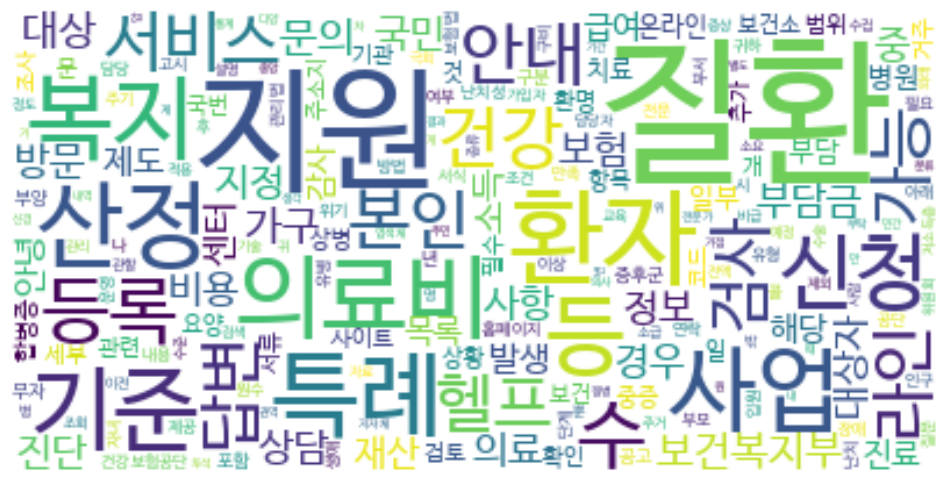

{'질환': 1930, '지원': 1303, '환자': 734, '산정': 617, '의료비': 609, '사업': 608, '특례': 597, '기준': 566, '복지': 552, '등': 466, '신청': 450, '수': 371, '등록': 342, '건강': 299, '안내': 295, '본인': 278, '헬프': 250, '라인': 250, '답변': 246, '서비스': 246, '검사': 245, '가능': 243, '보건복지부': 243, '가구': 238, '대상': 229, '문의': 227, '부담금': 206, '정보': 204, '국민': 200, '보험': 199}


In [21]:
import matplotlib.pyplot as plt
# plt.imshow(wordcloud)
# plt.axis("off") #x,y축 범례를 없애줌
# plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(top_30_words_2020)

### 2022년 키워드

In [22]:
dc_2022_title = df_dcinside.query("date == '2022'")["title"].to_list()
dc_2022_contents = df_dcinside.query("date == '2022'")["contents"].to_list()
list_dc_2022 = dc_2022_title + dc_2022_contents
list_dc_2022

['신경섬유종 한번에 다 제거하고싶다 수술로',
 '불치병이나 희귀한 질병들은',
 '내가 얼마나 살진 모르지만 말이다.',
 '니네 무도증이랑 강직성척추염 아냐',
 '20대 루게릭 초기임',
 '희귀난치성 질환 대학 입시 전형',
 '응 어짜피 끝나~',
 '신경섬유종 있어도 결혼한 사람들',
 '내 장점과 단점',
 '내 장점과 단점',
 '인생 ㅈㄴ 힘들다',
 'ㅌㅂㅈㅅ에서 희귀병애들 대상으로 인터뷰한다하면 하지마라',
 '나는 불치병을 가지고 있지만!',
 '망막 갤러리 개설함 (비주얼 스노우 및 관련질환 환영)',
 '신경섬유종 몸속안에 혹은 어떻게 아는거야??',
 '동무가되드립니다',
 '혈관기형 환자인데',
 '심한 과민성 대장 증후군이다...',
 '희귀병은 왜 장애인이아니냐',
 '건강할때가 얼마나 행복한거였는지 이제 알았다',
 '루게릭 잘 아는 사람 있냐?',
 '종양이랑 커피반점이랑 다른거임? 답변좀 ㅠㅜㅠ',
 '빨리 특이점와서 치료제 나왔으면 좋겠다',
 '신경섬유종...연애 고민',
 '섬유종이 그리 심각한 병이야?',
 '돌발운동유발 이상운동증 진단',
 '신경섬유종 씨ㅣㅣㅣ발',
 '쿠싱증후군',
 '비주얼스노우 있는게이 있냐..',
 '살아라 살아',
 '오늘은 눈 뜨자마자 기분이 좆같다',
 '진짜 너무 우울하다',
 '신경섬유종 커피/밀크 반점 존ㄴ 퍼져있는데;;',
 '아니 진짜 우성 유전병인데 왜 단순 임신으로 애를 낳음??',
 '신경섬유종인 사람들',
 '그냥 잡념 많아지고 트라우마생기고 살기싫다는생각 자꾸하니',
 '혈우병 ㅈ같네',
 '확진 안 나오고 의증만 나와서 산정특례도 못 받고 억울하다',
 '셀프 임상실험: 복숭아 음료수 후기',
 '희귀병도 특별전형 있냐',
 '올해안에',
 '건강했던때를 잊어야되는데',
 '이렇게 까지 살아야되냐',
 '여기에 비주얼스노우 있는 사람',
 '신경섬유종 진단 어케받아',
 '셀프임상 추천 받음',
 '신경섬유종 1형인데 연애해본 사람 있음?',
 '희귀병 환자들아 

In [23]:
helpline_2022_title = df_helpline.query("date == '2022'")["title_disease"].to_list()
helpline_2022_post = df_helpline.query("date == '2022'")["post_contents"].to_list()
helpline_2022_reply = df_helpline.query("date == '2022'")["reply_contents"].to_list()
list_helpline_2022 = helpline_2022_title + helpline_2022_post + helpline_2022_reply
list_helpline_2022

['의료비지원사업 심사중에\\n질환명 : 기관 또는 계통 침범을 동반한 전신홍반루푸스 (M32.1)',
 '희귀난치성질환 국제 심포지엄 또는 학술대회',
 '엘러스단로스 증후군 유전자진단검사비 지원여부',
 '엘러스 단로스증후군이라고 하는데요\\n질환명 : 엘러스-단로스증후군 (Q79.6)',
 '병원원무과에 10%추가 지원대상자라고 말하면 되는것인지 알고싶습니다.',
 '안녕하세요? 각 희귀질환의 국내 연구자 분을 찾으려면 또 어디서 확인할수 있을지요~?\\n질환명 : 돌발성 운동유발 이상운동 (G24.8)',
 '코핀시리스증후군을 진단받았어요',
 'H카드 등록 문의\\n질환명 : 신생아의 호흡곤란증후군 (P22.0)',
 '정확한 질환을 알지 못하고 병원을 헤매고 있습니다.',
 '"발작수면 및 허탈발작" 개요에 오정보가 있습니다.\\n질환명 : 발작수면 및 허탈발작 (G47.4)',
 '휘귀질환등록가능여부',
 '라스무센뇌염 병원 등록',
 '혈전성 혈소판감소성 자반증 의료비 혜택 문의\\n질환명 : 혈전성 혈소판감소성 자반 (M31.1)',
 '16p13.11 microduplication',
 '산정특례 문의드립니다.\\n질환명 : 드 랑즈 증후군 (Q87.1)',
 '희귀질환이 진단 받기 까지와 환자가 요청한 검사해서 시행 착오가 비용 소모가 심한것 같습니다. 여기에 일부 조금이라도 보상 지원이 있는지요?',
 '산정특례 관련 난치성희귀병 재진단요구 문의 합다..\\n질환명 : 근디스트로피 (G71.0)',
 '폐섬유화증으로 간병인 신청가능할까요?\\n질환명 : 특발성 폐섬유증 (J84.1)',
 '신생아 생후 수술시에는 어떻게 되는걸까요?\\n질환명 : 선천성단장증후군 (Q43.8)',
 '부양의무자 가족',
 '부신양성 신생물 (D35.0) 기타 쿠싱증후군 (E24.8)\\n질환명 : 쿠싱증후군 (E24)',
 '문의합니다.',
 '의료비지원궁금합니다\\n질환명 : 류마티스성 다발근통 (M35.3)',
 '의료비 지원 관련',
 '만성 신장병(

In [24]:
naver_2022_title = df_naver_symptom.query("question_datetime == '2022'")["question_title"].to_list()
naver_2022_question = df_naver_symptom.query("question_datetime == '2022'")["question_content"].to_list()
naver_2022_answer = df_naver_symptom.query("question_datetime == '2022'")["answer1_content"].to_list()
list_naver_2022 = naver_2022_title + naver_2022_question + naver_2022_answer
list_naver_2022

['중이염증상?',
 '중이염증상?',
 '귀가 먹먹하고 잘안들리는데 이런증상이 중이염증상인가요?',
 '귀가 먹먹하고 잘안들리는데 이런증상이 중이염증상인가요?',
 '안녕하세요. 대한의사협회·네이버 지식iN 상담의사 안태환 입니다.\\n귀가 먹먹하고 잘 안들리는 증상은 이관이 막혔을때 나타나는 증상입니다.\\n코하고 귀하고 통하는 관이 있습니다. 이관 이라고 하는데\\n흔히 코감기가 걸려서 코를 세게 풀거나 코안이 부어서 이관 입구가 막혔을때\\n나타나고 증상이 계속 되면 중이염이 될수 도 있습니다.\\n우선 본인이 할 수 있는건 귀가 먹먹한 쪽으로 껌을 씹으면 이관이 운동이 되서\\n뚫리는데 도움이 됩니다. \\n그러나 이비인후과에 가셔서 진찰을 받고 약을 드시고 치료를 받으셔야 합니다.\\n방치 하다가 중이염이 될 수 있으니 조심 하세요 ',
 '안녕하세요. 대한의사협회·네이버 지식iN 상담의사 안태환 입니다.\\n귀가 먹먹하고 잘 안들리는 증상은 이관이 막혔을때 나타나는 증상입니다.\\n코하고 귀하고 통하는 관이 있습니다. 이관 이라고 하는데\\n흔히 코감기가 걸려서 코를 세게 풀거나 코안이 부어서 이관 입구가 막혔을때\\n나타나고 증상이 계속 되면 중이염이 될수 도 있습니다.\\n우선 본인이 할 수 있는건 귀가 먹먹한 쪽으로 껌을 씹으면 이관이 운동이 되서\\n뚫리는데 도움이 됩니다. \\n그러나 이비인후과에 가셔서 진찰을 받고 약을 드시고 치료를 받으셔야 합니다.\\n방치 하다가 중이염이 될 수 있으니 조심 하세요 ']

In [25]:
list_2022 = list_dc_2022 + list_helpline_2022 + list_naver_2022
list_2022

['신경섬유종 한번에 다 제거하고싶다 수술로',
 '불치병이나 희귀한 질병들은',
 '내가 얼마나 살진 모르지만 말이다.',
 '니네 무도증이랑 강직성척추염 아냐',
 '20대 루게릭 초기임',
 '희귀난치성 질환 대학 입시 전형',
 '응 어짜피 끝나~',
 '신경섬유종 있어도 결혼한 사람들',
 '내 장점과 단점',
 '내 장점과 단점',
 '인생 ㅈㄴ 힘들다',
 'ㅌㅂㅈㅅ에서 희귀병애들 대상으로 인터뷰한다하면 하지마라',
 '나는 불치병을 가지고 있지만!',
 '망막 갤러리 개설함 (비주얼 스노우 및 관련질환 환영)',
 '신경섬유종 몸속안에 혹은 어떻게 아는거야??',
 '동무가되드립니다',
 '혈관기형 환자인데',
 '심한 과민성 대장 증후군이다...',
 '희귀병은 왜 장애인이아니냐',
 '건강할때가 얼마나 행복한거였는지 이제 알았다',
 '루게릭 잘 아는 사람 있냐?',
 '종양이랑 커피반점이랑 다른거임? 답변좀 ㅠㅜㅠ',
 '빨리 특이점와서 치료제 나왔으면 좋겠다',
 '신경섬유종...연애 고민',
 '섬유종이 그리 심각한 병이야?',
 '돌발운동유발 이상운동증 진단',
 '신경섬유종 씨ㅣㅣㅣ발',
 '쿠싱증후군',
 '비주얼스노우 있는게이 있냐..',
 '살아라 살아',
 '오늘은 눈 뜨자마자 기분이 좆같다',
 '진짜 너무 우울하다',
 '신경섬유종 커피/밀크 반점 존ㄴ 퍼져있는데;;',
 '아니 진짜 우성 유전병인데 왜 단순 임신으로 애를 낳음??',
 '신경섬유종인 사람들',
 '그냥 잡념 많아지고 트라우마생기고 살기싫다는생각 자꾸하니',
 '혈우병 ㅈ같네',
 '확진 안 나오고 의증만 나와서 산정특례도 못 받고 억울하다',
 '셀프 임상실험: 복숭아 음료수 후기',
 '희귀병도 특별전형 있냐',
 '올해안에',
 '건강했던때를 잊어야되는데',
 '이렇게 까지 살아야되냐',
 '여기에 비주얼스노우 있는 사람',
 '신경섬유종 진단 어케받아',
 '셀프임상 추천 받음',
 '신경섬유종 1형인데 연애해본 사람 있음?',
 '희귀병 환자들아 

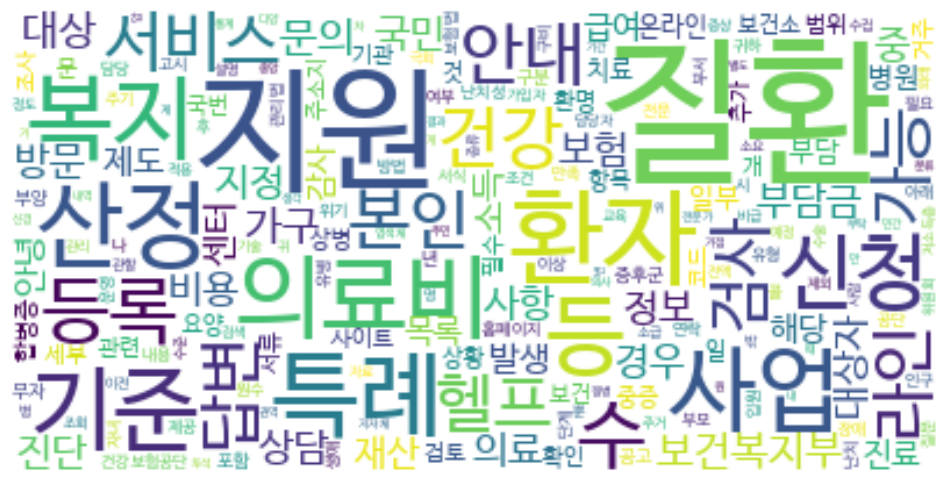

{'질환': 2299, '지원': 1451, '특례': 869, '산정': 863, '환자': 851, '의료비': 716, '사업': 637, '기준': 531, '신청': 506, '등록': 495, '등': 489, '수': 378, '검사': 374, '본인': 355, '건강': 330, '급여': 310, '헬프': 307, '라인': 307, '대상': 279, '진단': 276, '기관': 276, '가구': 271, '국민': 269, '경우': 264, '해당': 263, '부담금': 256, '보험': 254, '중': 250, '제도': 239, '정보': 238}


In [26]:
from mecab import MeCab
mecab = MeCab()

# morphs_nouns = []
morphs_nouns_list_2022 = []
for text in list_2022:

  morphs = mecab.nouns(text)
  # morphs_nouns.append(morphs)
  morphs_nouns_list_2022 = morphs_nouns_list_2022 + morphs
    
from collections import Counter
nouns_list_2022 = Counter(morphs_nouns_list_2022)

top_30_words_2022 = dict(nouns_list_2022.most_common(30))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(top_30_words_2022)

### 2023년 키워드

In [27]:
dc_2023_title = df_dcinside.query("date == '2023'")["title"].to_list()
dc_2023_contents = df_dcinside.query("date == '2023'")["contents"].to_list()
list_dc_2023 = dc_2023_title + dc_2023_contents
list_dc_2023

['아빠 커피 하루 6잔 마시는데 정상이야?',
 '이선균님 보면 나도 용기가생김',
 '결혼하고 아이 안 낳는거 이해해줄까?',
 '코셀루고 소아대상으로 보험적용된단다',
 '한번쯤 봐도 괜찮을 영상',
 '아산병원 신섬 좋음?',
 '신경섬유종인데 공익갈수 있나요',
 '신섬 있는 사람들 중 에 뼈 주변에 종양 있는 사람 있어?',
 '네이버카페 운영하는거보면 졸라 ㅂㅅ같지않음?',
 '신섬 님들은 어느 지역 돌아댕김.?',
 '신섬때문에 보건증 떼갈때마다 귀찮다',
 '신섬 질문이요',
 '신섬 걸렸다고 안좋은생각 난 망했어 생각하지마.',
 '이렇게생각하면 편함',
 '신섬 카페 보면 다들 결혼은 잘 하고 사는거 같아..',
 '이해가 안되는 행동',
 '연애 결혼에 너무 고민하지말자',
 '너무춥넹..다들 옷따뜻하게 입구 다녀 ㅡㅠ',
 '하… 나만 강척으로 끝날줄 알았는데',
 '나 레이노 증후군인데',
 '한 마디만 할게',
 '신섬인애들 읽어라',
 '스스로한테 좀 당당해지셈',
 '밸런스게임',
 '느낌이 좋다',
 '나를 이해해주는 사람이 나타날까',
 '몸도 왜소한데 노가다 밖에 할게 없네..',
 '유전자 검사 희귀질환 할려면 어떻게해야해?',
 '느낌이 좋음',
 '성인 되면 뭐 먹고 살지 모르겠다..',
 '신섬 종양 혹 간지럽고 따깝나요???',
 '신섬 혹 제거 술 해본게이?',
 '대학병원이 확실히 병같은거 잘찾긴 해??',
 '강직성척추염 있는사람들 통증관리',
 '나 초딩때',
 '아침부터 이거보고 기분 좆같네',
 '처음에 병 진단받았을땐 매일 울었는데 지금은 감정이 없음',
 '사경증 질문',
 '평범이 이렇게 어려운거였나?',
 '좆같노 ㄹㅇ',
 '11월달에 희귀질환 검사하러 병원가야함',
 '아 씨발 몸에 희귀질환 있는거 좃같다.',
 '신약 나온거 1형임? 2형임?',
 '신섬 신약 또있더라',
 '신경섬유종이 이제 더이상 희귀질환은 아닌듯',
 '슬프다',
 '신경섬유종',
 '신섬 판단좀',
 '이성관계라는게 접

In [28]:
helpline_2023_title = df_helpline.query("date == '2023'")["title_disease"].to_list()
helpline_2023_post = df_helpline.query("date == '2023'")["post_contents"].to_list()
helpline_2023_reply = df_helpline.query("date == '2023'")["reply_contents"].to_list()
list_helpline_2023 = helpline_2023_title + helpline_2023_post + helpline_2023_reply
list_helpline_2023

['치료약 의로비 대상\\n질환명 : 달리 분류되지 않은 미토콘드리아근병증 (G71.3)',
 '제가 유당불내증이 심한편이라 유전자검사를 받아보고 싶은데요.\\n질환명 : 젖당불내성 (E73)',
 '군발두통증후군 산정특례제도 되는지 확인하고싶어요\\n질환명 : 군발두통증후군 (G44.0)',
 '수부이식 환자의 희귀질환지정 신청 방법 문의\\n질환명 : 모든 복합의 팔 및 다리의 외상성 절단[모든 부위] (T05.6)',
 '진단및 치료가능 병원 진료과 알려주세요\\n질환명 : 안면신경의 기타 장애 (G51.8)',
 '산정특례 재등록 진행중 제외되었다는 통보를 받았습니다.\\n질환명 : 초점성 및 분절성 사구체병변을 동반한 신증후군 (N04.1)',
 '희귀질환의료비지원사업 1가구2환자 혜택',
 '남편이헤르만스키증후군인데요. 23주 임산부입니다.\\n질환명 : 헤르만스키-푸들라크증후군 (E70.3)',
 '운동 신경세포병\\n질환명 : 운동 신경세포병',
 '뇌전증문의\\n질환명 : 뇌전증 (G40)',
 '질병코드 상병코드',
 '긴QT증후군 유전자 검사 지원\\n질환명 : 긴QT증후군 (I49.82)',
 '희귀질환 진단은 어디서 받나요?\\n질환명 : 불완전상아질형성 (K00.51)',
 '질환에 대한 지원가능 확인\\n질환명 : 스티븐스-존슨증후군 (L51.1)',
 '보조기기 구입 문의\\n질환명 : 선천성 근디스트로피 NOS (G71.2)',
 '베커 근디스트로피 자녀 유전 여부 질문\\n질환명 : 양성[베커] 근디스트로피 (G71.0)',
 '불완전상아질형성 검사 방법?\\n질환명 : 불완전상아질형성 (K00.51)',
 '안녕하세요 1번 장완 염색체 미세결실 증후군 진단을 받았습니다\\n질환명 : 1번 장완 염색체 미세결실 증후군',
 '희귀질환\\n질환명 : 중증 아토피질환',
 '무도병,이상운동증 진단문의\\n질환명 : 헌팅톤무도병 (G10)',
 '의료비지원사업 재산 조회시 궁금한점이 있습니다.',
 '생선냄새증후군은 희귀 난치성 질환

In [29]:
naver_2023_title = df_naver_symptom.query("question_datetime == '2023'")["question_title"].to_list()
naver_2023_question = df_naver_symptom.query("question_datetime == '2023'")["question_content"].to_list()
naver_2023_answer = df_naver_symptom.query("question_datetime == '2023'")["answer1_content"].to_list()
list_naver_2023 = naver_2023_title + naver_2023_question + naver_2023_answer
list_naver_2023

['이명 원인 증상 무엇일까요?',
 '얼굴 건선증상 맞나요?',
 '장염의 증상은 무엇인가요?',
 '비문증 증상인가요? 글리터가',
 '독감? 코로나? 증상',
 '독감? 코로나? 증상',
 '임신 초기 증상',
 '역류성 식도염 증상 궁금합니다',
 '맹장염 초기 증상인가요?',
 '틱 증상 종류',
 '틱 증상 종류',
 '무릎십자인대 증상 계단에서',
 '돌발성 난청 증상',
 '혈뇨 증상 도와주세요',
 '망막박리 증상일까요??',
 '전립선암 증상 인지요?',
 '전립선암 증상 인지요?',
 '폐렴 초기증상?',
 '이 증상 뭔가요?',
 nan,
 '소변 이상 증상',
 '허리디스크 증상 확실한데',
 '허리디스크 증상 확실한데',
 '허리디스크 증상 죽겠네요',
 '혀가 자꾸 말리는 증상',
 '독감증상 궁금증!',
 '독감증상 궁금증!',
 '독감 코로나 증상',
 '남자 임질 증상',
 '허리디스크 증상 보일 때 ㅠㅠ',
 '질건조증 증상 좋아질 수 있나요?',
 '어깨탈구증상 계속 있네요..',
 '허리디스크 증상 완전 오래됨',
 '척추관협착증 증상 알려주세요',
 '열흘째 감기 기운 증상?',
 '열흘째 감기 기운 증상?',
 '에이즈 초기증상',
 '위암초기증상 일까요?',
 '협착증 증상 좀 알려주시와요~',
 nan,
 '췌장암 증상 질문',
 '부비동염 증상 어떤게 있나요?',
 '감기증상 빈맥',
 '방광염 증상 같은데',
 '독감 증상',
 '여자 방광염 증상 도와주세요!',
 '피부건선증상 재발했는데요..',
 '루게릭 초기증상',
 '뇌졸중 증상',
 '다른 증상없이 고열',
 '다른 증상없이 고열',
 '당뇨증상질문',
 '우측 눈 밑 눈꺼풀 떨림 증상',
 '남자 성병 증상 문의해요',
 '감기 증상',
 '협착증 증상 구부린 허리..',
 '한포진증상 궁금해요',
 '틱 증상인가요?',
 '특정 음식 섭취 후 설사증상',
 '당뇨 저혈당증상',
 '방광염 증상인거 같아요',
 '30대 심장마비 증상',
 '역류성식도

In [30]:
list_2023 = list_dc_2023 + list_helpline_2023 + list_naver_2023
list_2023

['아빠 커피 하루 6잔 마시는데 정상이야?',
 '이선균님 보면 나도 용기가생김',
 '결혼하고 아이 안 낳는거 이해해줄까?',
 '코셀루고 소아대상으로 보험적용된단다',
 '한번쯤 봐도 괜찮을 영상',
 '아산병원 신섬 좋음?',
 '신경섬유종인데 공익갈수 있나요',
 '신섬 있는 사람들 중 에 뼈 주변에 종양 있는 사람 있어?',
 '네이버카페 운영하는거보면 졸라 ㅂㅅ같지않음?',
 '신섬 님들은 어느 지역 돌아댕김.?',
 '신섬때문에 보건증 떼갈때마다 귀찮다',
 '신섬 질문이요',
 '신섬 걸렸다고 안좋은생각 난 망했어 생각하지마.',
 '이렇게생각하면 편함',
 '신섬 카페 보면 다들 결혼은 잘 하고 사는거 같아..',
 '이해가 안되는 행동',
 '연애 결혼에 너무 고민하지말자',
 '너무춥넹..다들 옷따뜻하게 입구 다녀 ㅡㅠ',
 '하… 나만 강척으로 끝날줄 알았는데',
 '나 레이노 증후군인데',
 '한 마디만 할게',
 '신섬인애들 읽어라',
 '스스로한테 좀 당당해지셈',
 '밸런스게임',
 '느낌이 좋다',
 '나를 이해해주는 사람이 나타날까',
 '몸도 왜소한데 노가다 밖에 할게 없네..',
 '유전자 검사 희귀질환 할려면 어떻게해야해?',
 '느낌이 좋음',
 '성인 되면 뭐 먹고 살지 모르겠다..',
 '신섬 종양 혹 간지럽고 따깝나요???',
 '신섬 혹 제거 술 해본게이?',
 '대학병원이 확실히 병같은거 잘찾긴 해??',
 '강직성척추염 있는사람들 통증관리',
 '나 초딩때',
 '아침부터 이거보고 기분 좆같네',
 '처음에 병 진단받았을땐 매일 울었는데 지금은 감정이 없음',
 '사경증 질문',
 '평범이 이렇게 어려운거였나?',
 '좆같노 ㄹㅇ',
 '11월달에 희귀질환 검사하러 병원가야함',
 '아 씨발 몸에 희귀질환 있는거 좃같다.',
 '신약 나온거 1형임? 2형임?',
 '신섬 신약 또있더라',
 '신경섬유종이 이제 더이상 희귀질환은 아닌듯',
 '슬프다',
 '신경섬유종',
 '신섬 판단좀',
 '이성관계라는게 접

In [31]:
from mecab import MeCab
mecab = MeCab()
# morphs_nouns = []
morphs_nouns_list_2023 = []

for text in list_2023:
    if type(text) == str:
      morphs = mecab.nouns(text)
      # morphs_nouns.append(morphs)
      morphs_nouns_list_2023 = morphs_nouns_list_2023 + morphs

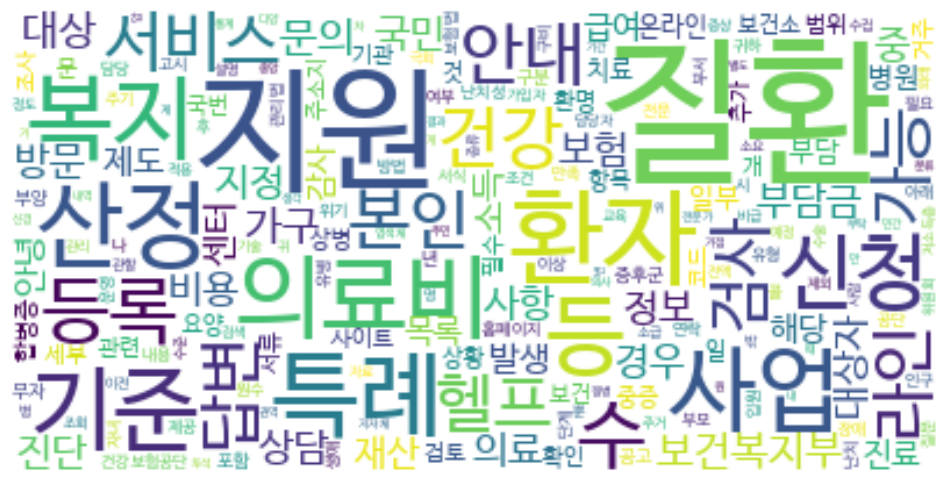

{'질환': 3052, '증상': 1624, '지원': 1471, '수': 1054, '등': 855, '환자': 820, '특례': 752, '산정': 737, '의료비': 690, '기준': 682, '것': 649, '치료': 629, '사업': 628, '검사': 577, '신청': 549, '경우': 494, '지정': 473, '가능': 471, '진단': 470, '등록': 423, '건강': 413, '발생': 407, '본인': 380, '급여': 380, '대상': 368, '안녕': 366, '중': 365, '라인': 356, '헬프': 355, '병원': 339}


In [32]:
from collections import Counter
nouns_list_2023 = Counter(morphs_nouns_list_2023)

top_30_words_2023 = dict(nouns_list_2023.most_common(30))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(top_30_words_2023)

### 2024년 키워드

In [33]:
dc_2024_title = df_dcinside.query("date == '2024'")["title"].to_list()
dc_2024_contents = df_dcinside.query("date == '2024'")["contents"].to_list()
list_dc_2024 = dc_2024_title + dc_2024_contents
list_dc_2024

['갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?',
 '영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지',
 '검사 받는 병원 근처 지역 병원으로 바꿈',
 '섬유종 수술은 아산병원이 젤 나음?',
 '신섬 증상 별로 안 심하면 코셀루고 약 못 먹나?',
 '루게릭병 전조증상이 느껴져요',
 '신경 섬유종 치료제 적용확대 청원인데',
 '충북대병원 코셀루고 투약 시작했대',
 'ㅅㅂ나 허리디스크 생긴거 같아...',
 '서울대 어린이 병원 다니다 서울대 병원 옮기고 맘에 안들어서 안다니는데',
 '곧 신검 받아야 하네...',
 '생명과 복의 순환__퍼옴',
 '여기 골덴 하 증후군 없냐',
 '생명과 복의 순환__퍼옴',
 '질문 (장문)',
 '생명과 복의 순환__퍼옴',
 '마음의상처...',
 '신섬카페 종치자마자 강등당했네 ㅋㅋㅋ',
 '피부랑 똑같은색으로 점있는 부분만 문신하면 티는 조금 나겠지만 조금은 희미해질듯',
 'https://www.newsthevoice.com/news/articleView.html?idxno=36427\\n 영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지\\n영국 의약품규제청은 플루오로퀴놀론계열 항생제가 다른 계열의 항생제에 부적절한 경우에만 처방토록 아예 1차요법 사용을 금지시켰다.영국 의약품규제청(MHRA)는 지난 22일 경구, 주사 또는 흡입을 통해 전신에 투여되는 플루오로키놀론계열 항생제는 사용하기에 적합한 다른 항생제가 없는 경우로 제한키로 했다고 발표했다.이는 2019년 일부 심각하지 않은 감염이나 전립선염 등 비세균성 질환에 대한 1차 사용금지에도 불구 이상반응 보고가 지속되고 처방패턴의 변화가 없음에 따라 시행되는 추가조치다.MHRA는 이번 조치는 부작용을 줄이기 위해 진\\nwww.newsthevoice.com\\n\\n\\nhttps://www.yakup.com/news/index.html?mode=view&cat=16&nid=281566\\nEU, 플루오로퀴놀론系 항생

In [34]:
helpline_2024_title = df_helpline.query("date == '2024'")["title_disease"].to_list()
helpline_2024_post = df_helpline.query("date == '2024'")["post_contents"].to_list()
helpline_2024_reply = df_helpline.query("date == '2024'")["reply_contents"].to_list()
list_helpline_2024 = helpline_2024_title + helpline_2024_post + helpline_2024_reply
list_helpline_2024

['소아피부근염\\n질환명 : 기타 피부근염 (M33.1)',
 '상계백병원에서 근무력증 진단을 받았습니다.\\n질환명 : 중증근무력증 (G70.0)',
 '국민연금 장애연금\\n질환명 : 특발성 무형성빈혈 (D61.3)',
 '희귀질환 의료비 지원사업 신청후에....\\n질환명 : 항인지질항체증후군 (D68.6)',
 '의료비지원 부양의무자',
 '희귀병 약국 서울에만있나요 서울에 몇곳인가요',
 '디스토니아 신약 임상 신청\\n질환명 : 선천성 (흉골유돌근)사경 (Q68.0)',
 '질병코드확인',
 '희귀질환자 의료비 지원 제도, 2024년 업데이트',
 '미분화결합조직 하시모토병\\n질환명 : 베체트병 (M35.2)',
 '희귀질환 등록 요청합니다.\\n질환명 : 동안실행증(失行症), 코간형 (H51.8)',
 '16p11.2미세중복증후군 539 kb 산정특례가 되나요?\\n질환명 : 16p11.2미세중복증후군 539 kb',
 '치료가능한 병원리스트',
 '강직성척추염 요추부',
 '유전자 진단 지원대상인지 궁금합니다.',
 '지원제도 문의\\n질환명 : 산발형 근위축측삭경화증 (G12.21)',
 '고함-스타우트병 Gorham-Stout disease (GSD) 상병코드\\n질환명 : 고함-스타우트 병',
 '에드워즈증후군 환자등록 절차가 궁금합니다\\n질환명 : 상세불명의 에드워즈증후군 (Q91.3)',
 '지침 한글 파일',
 '대상자 조회',
 '할러포르덴 ㅡ스팟츠 의료급여',
 '다골성 섬유성 형성이상 진단 및 수술 입원 진료비 환불 가능할까요?\\n질환명 : 다골성 섬유성 형성이상 (Q78.1)',
 '의료비지원대상 질환 문의\\n질환명 : 강직척추염, 흉요추부 (M45.5)',
 '복합부위증후군 1형\\n질환명 : 복합부위증후군 1형',
 '22q11.2 중복 증후군 고위험 판정을받았습니다.\\n질환명 : 22q11.2 중복 증후군',
 "극희귀질환 혹은 희귀질환\\n질환명 : trevor's disease",
 '치료문의\\n질환명 : 

In [35]:
naver_2024_title = df_naver_symptom.query("question_datetime == '2024'")["question_title"].to_list()
naver_2024_question = df_naver_symptom.query("question_datetime == '2024'")["question_content"].to_list()
naver_2024_answer = df_naver_symptom.query("question_datetime == '2024'")["answer1_content"].to_list()
list_naver_2024 = naver_2024_title + naver_2024_question + naver_2024_answer
list_naver_2024

['전립선비대증 증상 수술 문의',
 '주부습진 증상 왜 안없어질까요?',
 '무릎통증 증상 ㅜㅜ 참고로 20대',
 '무릎통증 증상 꽤 오래됐는데',
 '돌발성 난청 증상이 맞나요?',
 '임신 초기증상 알려주세요',
 '관계 후 증상',
 '여자 방광염 증상 어떡하죠?',
 '장염증상 질문',
 '당뇨초기증상 맞나요?',
 '관계후 증상',
 '위염 증상',
 '남자 성병 증상 질문 급해요!',
 '손발마비 증상',
 nan,
 '이거 감기 증상인가요',
 '당뇨 초기증상 인듯한데요...',
 '생리전증후군(PMS)증상',
 '공황장애 증상',
 '뇌종양 증상',
 '비문증? 증상 6개월',
 '공황발작 증상인가요?',
 '가슴이 답답한 증상',
 '헤르페스2형 증상 질염',
 '생리전증상 갈수록 더해갑니다',
 '위암초기증상 일까요?',
 '감기 증상 및 고혈압',
 '풍치증상 맞나요?',
 '지루성 두피염 초기 증상',
 '비타민D 부족증상',
 '비타민D 부족증상',
 '비타민D 부족증상',
 '생리전증상인가요',
 '질염 증상인가요?',
 '독감 증상',
 '독감 증상',
 '대장암증상 극복에 좋은 것',
 '대장암증상 극복에 좋은 것',
 '대장암증상 극복에 좋은 것',
 '뇌졸중 전조증상',
 '불안장애 라고 하는데 증상??',
 '불안장애 라고 하는데 증상??',
 '위축성위염증상 맞는건가요?',
 '후두염 증상이 자주 와요',
 '이거 혹시 무슨 증상일까요?',
 '관계후 증상',
 '에이즈 증상',
 '전립선비대증 증상 인가요?',
 '인도여행 시 증상 및 질병',
 '족저근막염 증상일까요',
 '무지외반증 증상 왜 계속 있져',
 '남성갱년기 증상',
 '전립선염 증상 때문에',
 '남자 갱년기 증상',
 '중학생 질염 증상',
 '몸살증상과 비슷한 암종류',
 'adhd증상',
 '무슨 전조증상일까요?',
 '이것도 공황 증상 맞을까요?',
 '폐암 초기 증상일까요?',
 '폐암 초기 증상일까요?',
 '코로나 증상',
 '전립선비대증 

In [36]:
list_2024 = list_dc_2024 + list_helpline_2024 + list_naver_2024
list_2024

['갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?',
 '영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지',
 '검사 받는 병원 근처 지역 병원으로 바꿈',
 '섬유종 수술은 아산병원이 젤 나음?',
 '신섬 증상 별로 안 심하면 코셀루고 약 못 먹나?',
 '루게릭병 전조증상이 느껴져요',
 '신경 섬유종 치료제 적용확대 청원인데',
 '충북대병원 코셀루고 투약 시작했대',
 'ㅅㅂ나 허리디스크 생긴거 같아...',
 '서울대 어린이 병원 다니다 서울대 병원 옮기고 맘에 안들어서 안다니는데',
 '곧 신검 받아야 하네...',
 '생명과 복의 순환__퍼옴',
 '여기 골덴 하 증후군 없냐',
 '생명과 복의 순환__퍼옴',
 '질문 (장문)',
 '생명과 복의 순환__퍼옴',
 '마음의상처...',
 '신섬카페 종치자마자 강등당했네 ㅋㅋㅋ',
 '피부랑 똑같은색으로 점있는 부분만 문신하면 티는 조금 나겠지만 조금은 희미해질듯',
 'https://www.newsthevoice.com/news/articleView.html?idxno=36427\\n 영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지\\n영국 의약품규제청은 플루오로퀴놀론계열 항생제가 다른 계열의 항생제에 부적절한 경우에만 처방토록 아예 1차요법 사용을 금지시켰다.영국 의약품규제청(MHRA)는 지난 22일 경구, 주사 또는 흡입을 통해 전신에 투여되는 플루오로키놀론계열 항생제는 사용하기에 적합한 다른 항생제가 없는 경우로 제한키로 했다고 발표했다.이는 2019년 일부 심각하지 않은 감염이나 전립선염 등 비세균성 질환에 대한 1차 사용금지에도 불구 이상반응 보고가 지속되고 처방패턴의 변화가 없음에 따라 시행되는 추가조치다.MHRA는 이번 조치는 부작용을 줄이기 위해 진\\nwww.newsthevoice.com\\n\\n\\nhttps://www.yakup.com/news/index.html?mode=view&cat=16&nid=281566\\nEU, 플루오로퀴놀론系 항생

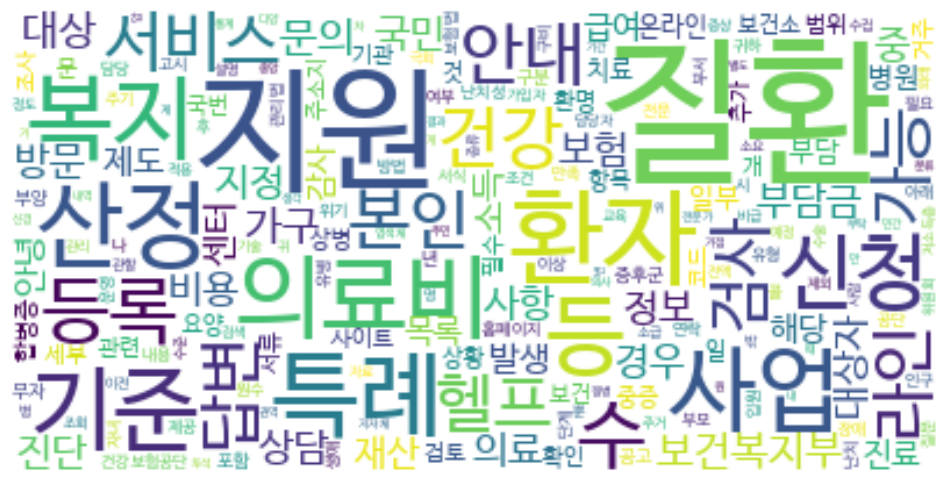

{'질환': 689, '증상': 581, '지원': 413, '수': 321, '등': 278, '환자': 268, '특례': 203, '것': 202, '산정': 201, '의료비': 191, '사업': 188, '기준': 185, '장애': 179, '치료': 169, '검사': 158, '신청': 154, '건강': 151, '불안': 134, '경우': 130, '등록': 125, '진단': 122, '본인': 121, '후': 115, '발생': 114, '보험': 113, '급여': 112, '상담': 112, '가능': 106, '안녕': 97, '대상': 95}


In [37]:
from mecab import MeCab
mecab = MeCab()
# morphs_nouns = []
morphs_nouns_list_2024 = []

for text in list_2024:
    if type(text) == str:
      morphs = mecab.nouns(text)
      # morphs_nouns.append(morphs)
      morphs_nouns_list_2024 = morphs_nouns_list_2024 + morphs
        
from collections import Counter
nouns_list_2024 = Counter(morphs_nouns_list_2024)

top_30_words_2024 = dict(nouns_list_2024.most_common(30))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(top_30_words_2024)

## 연도별 키워드 분포 시각화

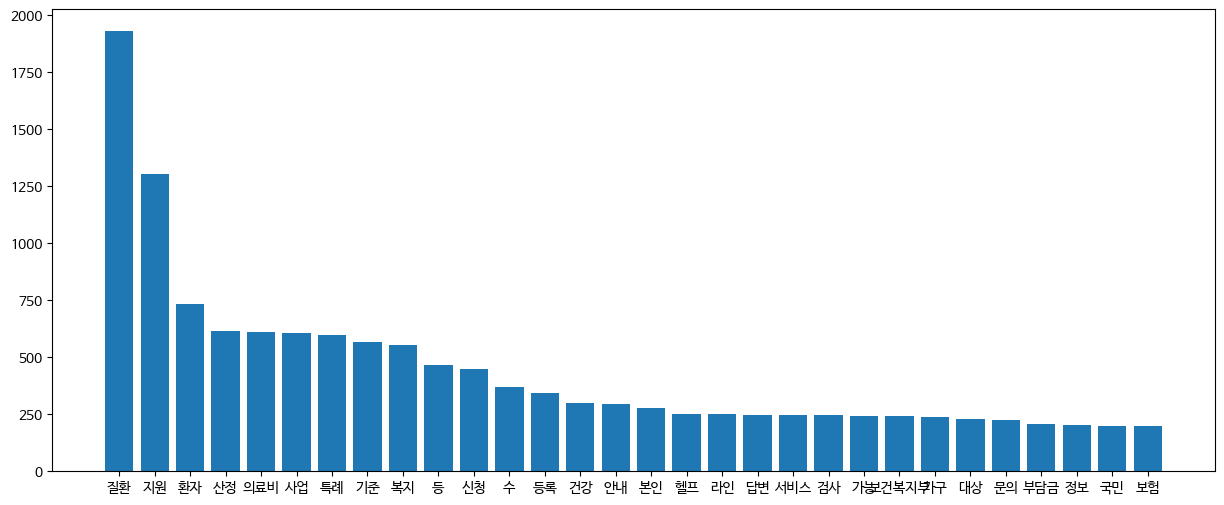

In [38]:
### 2020년 키워드 분포
labels = top_30_words_2020.keys()
values = top_30_words_2020.values()
plt.figure(figsize=(15, 6))
plt.bar(labels, values)
plt.show()

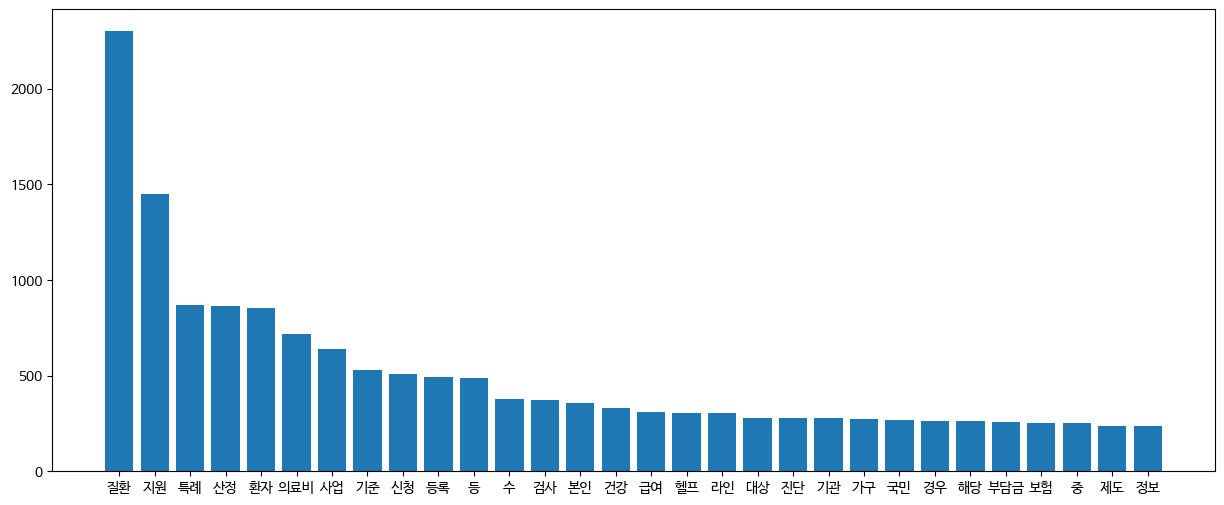

In [39]:
### 2022년 키워드 분포
labels = top_30_words_2022.keys()
values = top_30_words_2022.values()
plt.figure(figsize=(15, 6))
plt.bar(labels, values)
plt.show()

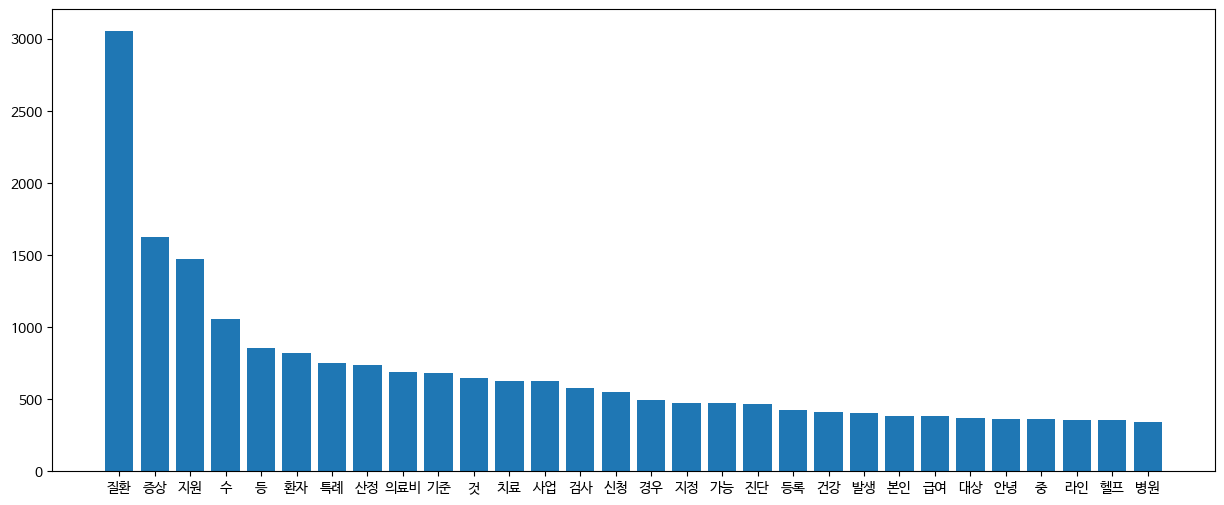

In [40]:
### 2023년 키워드 분포
labels = top_30_words_2023.keys()
values = top_30_words_2023.values()
plt.figure(figsize=(15, 6))
plt.bar(labels, values)
plt.show()

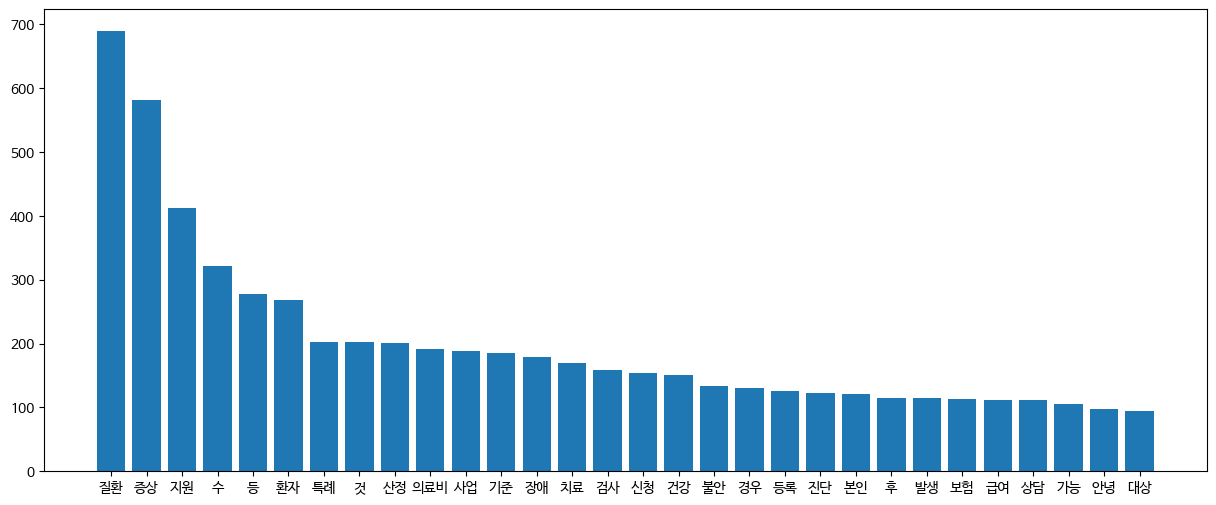

In [41]:
### 2024년 키워드 분포
labels = top_30_words_2024.keys()
values = top_30_words_2024.values()
plt.figure(figsize=(15, 6))
plt.bar(labels, values)
plt.show()

## 인사이트 도출
- 분석결과 : 대체적으로 질환, 증상, 지원, 의료비 환자 등의 키워드의 분포가 많은 것을 확인할 수 있었음.
- 분석전략 : 키워드들에 해당하는 내용들에 대한 감정분석을 실시하여 해당하는 키워드가 긍정적인지 부정적인지 판별할 필요가 있음.